<a href="https://colab.research.google.com/github/Hk564/Datascience/blob/main/ML_APP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [7]:
from google.colab import files
uploaded = files.upload()

Saving survey_results_public.csv to survey_results_public.csv


In [8]:
ps =pd.read_csv("survey_results_public.csv")

In [9]:
ps.shape

(89184, 84)

In [10]:
ps

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN


In [11]:
#Filtering Country,edlevel.....for prediction
ps = ps[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
ps = ps.rename({"ConvertedCompYearly":"Salary"},axis =1)
ps.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [12]:
#Filtering not null values
ps = ps[ps["Salary"].notnull()]


In [13]:
ps.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [14]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Employment    48007 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [15]:
ps = ps.dropna()
ps.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [16]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47813 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       47813 non-null  object 
 1   EdLevel       47813 non-null  object 
 2   YearsCodePro  47813 non-null  object 
 3   Employment    47813 non-null  object 
 4   Salary        47813 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [14]:
print(len(ps['Employment'].unique()))

14


In [23]:
ps

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0
...,...,...,...,...,...
89162,Brazil,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",24,"Employed, full-time",50719.0
89166,Armenia,Some college/university study without earning ...,2,"Employed, full-time;Independent contractor, fr...",16917.0
89167,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",15752.0
89170,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Employed, full-time",64254.0


In [17]:
ps_employment= ps[ps["Employment"]=="Employed, full-time"]
ps_employment = ps.drop("Employment",axis=1)
ps_employment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47813 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       47813 non-null  object 
 1   EdLevel       47813 non-null  object 
 2   YearsCodePro  47813 non-null  object 
 3   Salary        47813 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.8+ MB


In [18]:
ps_employment =ps

In [19]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47813 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       47813 non-null  object 
 1   EdLevel       47813 non-null  object 
 2   YearsCodePro  47813 non-null  object 
 3   Employment    47813 non-null  object 
 4   Salary        47813 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


Grouping the countries

In [20]:
ps['Country'].value_counts()

United States of America                                11846
Germany                                                  3947
United Kingdom of Great Britain and Northern Ireland     3521
Canada                                                   2095
India                                                    1849
                                                        ...  
Guinea-Bissau                                               1
Mauritania                                                  1
Botswana                                                    1
Guyana                                                      1
Antigua and Barbuda                                         1
Name: Country, Length: 171, dtype: int64

In [26]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [27]:
#counting the categorical value counts and creating a dictionary
country_map = shorten_categories(ps.Country.value_counts(), 400)
ps['Country'] = ps['Country'].map(country_map)
ps.Country.value_counts()

United States of America                                11846
Other                                                    8307
Germany                                                  3947
United Kingdom of Great Britain and Northern Ireland     3521
Canada                                                   2095
India                                                    1849
France                                                   1793
Netherlands                                              1359
Poland                                                   1265
Brazil                                                   1249
Australia                                                1206
Spain                                                    1142
Sweden                                                   1055
Italy                                                    1009
Switzerland                                               659
Austria                                                   531
Denmark 

In [28]:
ps.EdLevel

1             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
2             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
3             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
4             Bachelor’s degree (B.A., B.S., B.Eng., etc.)
5        Some college/university study without earning ...
                               ...                        
89162      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
89166    Some college/university study without earning ...
89167         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
89170      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
89171      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
Name: EdLevel, Length: 47813, dtype: object

In [29]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47813 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       47813 non-null  object 
 1   EdLevel       47813 non-null  object 
 2   YearsCodePro  47813 non-null  object 
 3   Employment    47813 non-null  object 
 4   Salary        47813 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


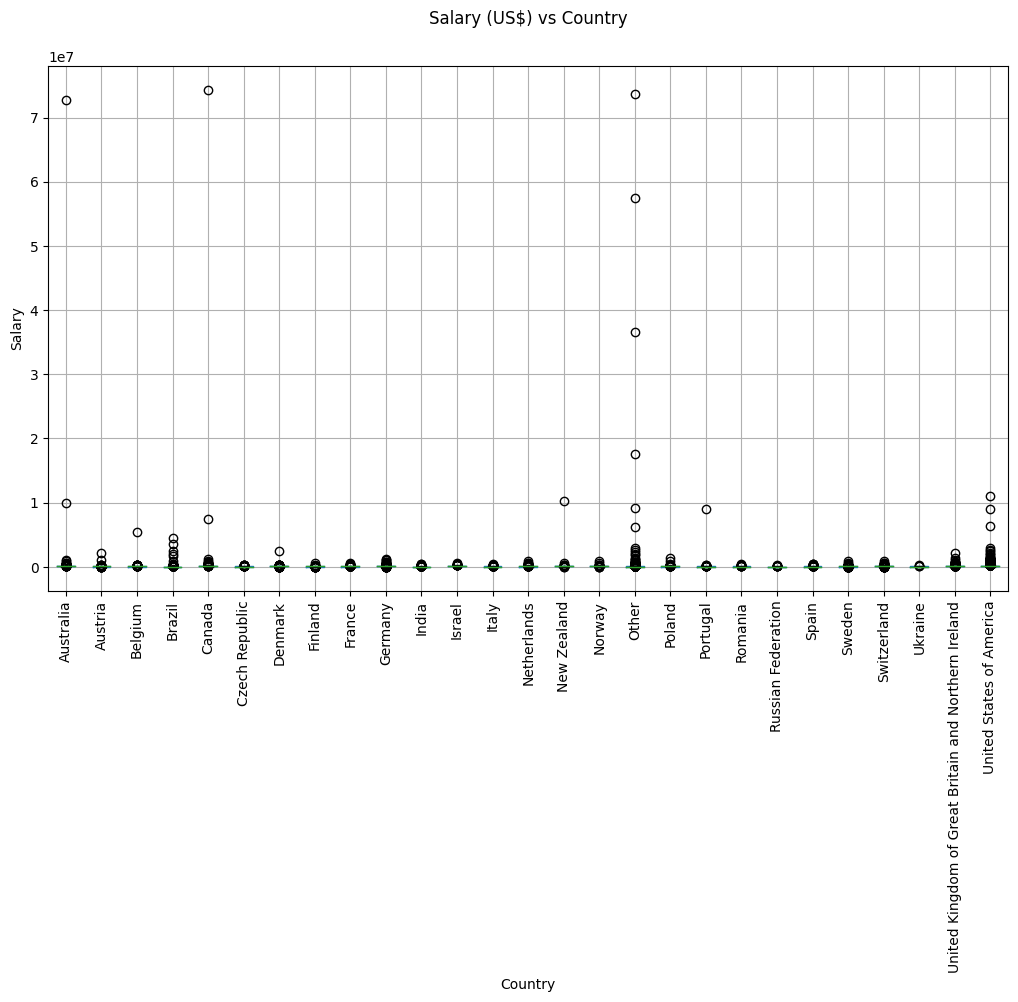

In [31]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
ps.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')

plt.xticks(rotation=90)
plt.show()

Removing salary outliers (values above 250,000 or below 10,000).
Filtering out rows where the country is labeled as 'Other', assuming 'Other' is a category that should be excluded from the analysis.

In [33]:
ps = ps[ps["Salary"] <= 250000]
ps = ps[ps["Salary"] >= 10000]
ps = ps[ps['Country'] != 'Other']
ps

,Country,EdLevel,YearsCodePro,Employment,Salary
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0
6,United States of America,Some college/university study without earning ...,3,"Employed, full-time",135000.0
7,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",80000.0
...,...,...,...,...,...
89156,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,"Employed, full-time",195000.0
89158,Sweden,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,"Employed, full-time",52981.0
89162,Brazil,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",24,"Employed, full-time",50719.0
89167,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",15752.0


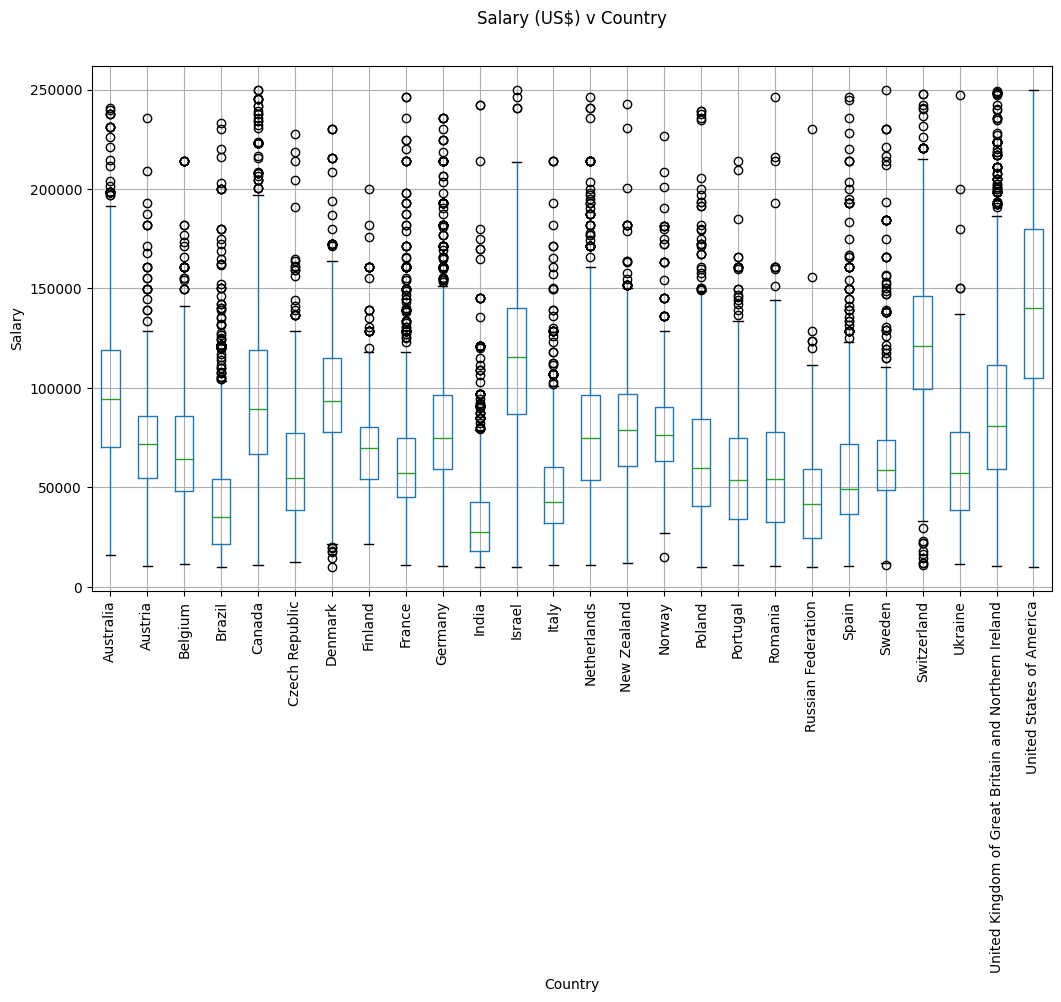

In [34]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
ps.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [35]:
ps["YearsCodePro"].unique()

array(['23', '7', '21', '3', '15', '9', 'Less than 1 year', '10', '2',
       '6', '14', '5', '19', '13', '16', '28', '30', '24', '40', '4',
       '25', '12', '20', '11', '8', '18', '50', '27', '17', '43', '26',
       '38', '33', '29', '22', '1', '31', '34', '37', '42',
       'More than 50 years', '36', '39', '35', '41', '32', '44', '48',
       '45', '46', '47', '49'], dtype=object)

In [36]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

ps['YearsCodePro'] = ps['YearsCodePro'].apply(clean_experience)

In [37]:
ps["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [38]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

ps['EdLevel'] = ps['EdLevel'].apply(clean_education)

In [39]:
ps["EdLevel"].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

Preprocessing of model - using encoder to transform categorical data to numerical value




In [40]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
ps['EdLevel'] = le_education.fit_transform(ps['EdLevel'])
ps["EdLevel"].unique()

array([0, 1, 2, 3])

In [83]:

le_country = LabelEncoder()
ps['Country'] = le_country.fit_transform(ps['Country'])
ps["Country"].unique()

array([25, 24,  7,  0, 13,  9, 21,  8, 20,  3, 17, 12,  4, 22, 10,  1, 15,
       19, 16,  2,  6, 11, 23,  5, 18, 14])

In [42]:
ps

,Country,EdLevel,YearsCodePro,Employment,Salary
2,25,0,23.0,"Employed, full-time",250000.0
3,25,0,7.0,"Employed, full-time",156000.0
5,24,1,21.0,"Employed, full-time",96828.0
6,25,1,3.0,"Employed, full-time",135000.0
7,25,0,3.0,"Employed, full-time",80000.0
...,...,...,...,...,...
89156,25,0,8.0,"Employed, full-time",195000.0
89158,21,0,8.0,"Employed, full-time",52981.0
89162,3,2,24.0,"Employed, full-time",50719.0
89167,10,0,2.0,"Employed, full-time",15752.0


In [67]:

X = ps.drop(["Salary","Employment"], axis=1)

Y = ps["Salary"]

In [68]:
X

,Country,EdLevel,YearsCodePro
2,25,0,23.0
3,25,0,7.0
5,24,1,21.0
6,25,1,3.0
7,25,0,3.0
...,...,...,...
89156,25,0,8.0
89158,21,0,8.0
89162,3,2,24.0
89167,10,0,2.0


In [69]:

from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, Y.values) #why numpy representation of the data is taken here instead of Y
#for the fit() method data is expected to be in Numpy array format

LinearRegression()

In [70]:
y_pred = linear_reg.predict(X)

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(Y, y_pred))

In [75]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, Y.values)

DecisionTreeRegressor(random_state=0)

In [76]:
y_pred = dec_tree_reg.predict(X)


In [77]:
error = np.sqrt(mean_squared_error(Y, y_pred))
print("${:,.02f}".format(error))

$34,551.31


In [78]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, Y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [79]:
regressor = gs.best_estimator_

regressor.fit(X, Y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(Y, y_pred))
print("${:,.02f}".format(error))

$35,985.58


In [80]:

X

,Country,EdLevel,YearsCodePro
2,25,0,23.0
3,25,0,7.0
5,24,1,21.0
6,25,1,3.0
7,25,0,3.0
...,...,...,...
89156,25,0,8.0
89158,21,0,8.0
89162,3,2,24.0
89167,10,0,2.0


In [84]:

# country, edlevel, yearscode
X = np.array([["United States", 'Master’s degree', 15 ]])
X

array([['United States', 'Master’s degree', '15']], dtype='<U21')

In [85]:

X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

ValueError: invalid literal for int() with base 10: 'United States'

In [ ]:

y_pred = regressor.predict(X)
y_pred

In [ ]:
import pickle

In [ ]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [ ]:

y_pred = regressor_loaded.predict(X)
y_pred